<a href="https://colab.research.google.com/github/kdmid/Class_Python/blob/main/Kaggle/Home_Credit_Default_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. 데이터 불러오기

## 1.1. Kaggle API 설치
- `Google Colab`에서 `Kaggle API`를 불러오려면 다음 소스코드를 실행한다. 

In [ ]:
!pip install kaggle

## 1.2. Kaggle Token 다운로드
- Kaggle에서 `API Token`을 다운로드 받는다. 
- [Kaggle]-[My Account]-[API]-[Create New API Token]을 누르면 kaggle.json 파일이 다운로드 된다. 
- 이 파일을 바탕화면에 옮긴 뒤, 아래 코드를 실행 시킨다.




In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# kaggle.json을 아래 폴더로 옮긴 뒤, file을 사용할 수 있도록 권한을 부여한다. 
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
uploaded file "kaggle.json" with length 67 bytes


In [ ]:
ls -1ha ~/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


- 에러 메시지가 없으면 성공적으로 `json` 파일이 업로드 되었다는 뜻이다. 

## 1.3. Kaggle 데이터 불러오기
- 먼저 kaggle competition list를 불러온다.

In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        134           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        161           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        292           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2248           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      17286            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4335            True  
connectx

- 여기에서 참여하기 원하는 대회의 데이터셋을 불러오면 된다. 
- **!kaggle competitions download -c + 대회명 (위의 목록 중 찾아서 복사 붙여넣기하기)**

In [ ]:
!kaggle competitions download -c home-credit-default-risk

 47% 17.0M/36.1M [00:00<00:00, 20.3MB/s]
100% 36.1M/36.1M [00:00<00:00, 41.3MB/s]
 89% 97.0M/109M [00:02<00:00, 26.8MB/s]
100% 109M/109M [00:03<00:00, 37.6MB/s] 
 86% 5.00M/5.81M [00:00<00:00, 22.8MB/s]
100% 5.81M/5.81M [00:00<00:00, 23.0MB/s]
 85% 65.0M/76.3M [00:01<00:00, 33.2MB/s]
100% 76.3M/76.3M [00:01<00:00, 46.5MB/s]
 86% 49.0M/56.8M [00:02<00:00, 17.8MB/s]
100% 56.8M/56.8M [00:02<00:00, 25.0MB/s]
 82% 30.0M/36.8M [00:01<00:00, 7.81MB/s]
100% 36.8M/36.8M [00:01<00:00, 29.2MB/s]
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 29.2MB/s]
 98% 265M/271M [00:07<00:00, 36.7MB/s]
100% 271M/271M [00:07<00:00, 39.1MB/s]
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 167MB/s]
 84% 81.0M/96.7M [00:02<00:00, 27.2MB/s]
100% 96.7M/96.7M [00:02<00:00, 41.1MB/s]


- 데이터 압축 풀기

In [ ]:
! unzip application_test.csv.zip
! unzip application_train.csv.zip
! unzip bureau_balance.csv.zip
! unzip bureau.csv.zip
! unzip credit_card_balance.csv.zip
! unzip installments_payments.csv.zip
! unzip POS_CASH_balance.csv.zip
! unzip previous_application.csv.zip

Archive:  application_test.csv.zip
  inflating: application_test.csv    
Archive:  application_train.csv.zip
  inflating: application_train.csv   
Archive:  bureau_balance.csv.zip
  inflating: bureau_balance.csv      
Archive:  bureau.csv.zip
  inflating: bureau.csv              
Archive:  credit_card_balance.csv.zip
  inflating: credit_card_balance.csv  
Archive:  installments_payments.csv.zip
  inflating: installments_payments.csv  
Archive:  POS_CASH_balance.csv.zip
  inflating: POS_CASH_balance.csv    
Archive:  previous_application.csv.zip
  inflating: previous_application.csv  


In [ ]:
!ls

application_test.csv	     HomeCredit_columns_description.csv
application_test.csv.zip     installments_payments.csv
application_train.csv	     installments_payments.csv.zip
application_train.csv.zip    POS_CASH_balance.csv
bureau_balance.csv	     POS_CASH_balance.csv.zip
bureau_balance.csv.zip	     previous_application.csv
bureau.csv		     previous_application.csv.zip
bureau.csv.zip		     sample_data
credit_card_balance.csv      sample_submission.csv
credit_card_balance.csv.zip


# II. 데이터 확인

- 이 데이터는 은행을 이용하지 않은 사람들에게 신용대출(대출)을 제공하는 서비스인 [Home Credit](https://www.homecredit.net/about-us.aspx)에서 제공된다.
- 고객이 대출금을 상환가능 여부를 예측하는 것은 매우 중요하다.
- Supervised: label은 교육 데이터에 포함되며, 목적은 feature로부터 label을 예측하는 방법을 학습하는 모델을 훈련시키는 것이다.
- Classification: 0(대출금을 제 때 상환할 수 있음), 1(대출금 상환에 어려움이 있음)

- application_train/application_test: Home Credit에서 대출 신청에 대한 정보가 포함된 주요 교육 및 테스트 데이터
- bureau: 다른 금융 기관에서 고객의 과거 신용에 관한 데이터
- bureau_balance: 과거 신용에 대한 월별 데이터
- POS_CASH_BANCE: Home Credit이 가지고 있는 고객의 이전 판매 시점 또는 현금 대출에 대한 월별 데이터
- credit_card_balance: Home Credit에서 고객이 가지고 있던 이전 신용 카드에 대한 월별 데이터
- installments_payment: Home Credit의 이전 대출에 대한 지급 내역

## 2.1. 패키지를 설치

In [ ]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2. 데이터 확인

In [ ]:
# List files available
print(os.listdir())

['.config', 'previous_application.csv', 'application_train.csv', 'bureau_balance.csv', 'application_test.csv.zip', 'bureau.csv', 'POS_CASH_balance.csv', 'previous_application.csv.zip', 'bureau_balance.csv.zip', 'POS_CASH_balance.csv.zip', 'HomeCredit_columns_description.csv', 'bureau.csv.zip', 'installments_payments.csv.zip', 'sample_submission.csv', 'installments_payments.csv', 'application_train.csv.zip', 'credit_card_balance.csv', 'application_test.csv', 'credit_card_balance.csv.zip', 'sample_data']


In [ ]:
# Training data
app_train = pd.read_csv('application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Testing data features
app_test = pd.read_csv('application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# III. 데이터 분석 EDA(Exploratory Data Analysis)


## Examine the Distribution of the Target Column
- Target은 우리가 예측하는 것을 묻는 것이다. 0(대출금을 제 때 상환할 수 있음), 1(대출금 상환에 어려움이 있음)
- 우리는 우선 각 범주에 속하는 대출의 수를 조사할 수 있다.

In [ ]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

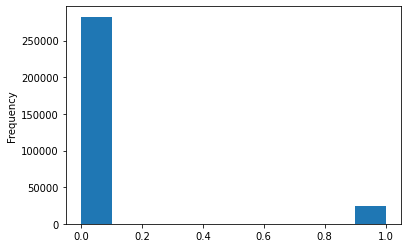

In [ ]:
app_train['TARGET'].astype(int).plot.hist();

- 여기서 데이터의 불균형함을 확인할 수 있다.
- 제때 갚지 못한 대출보다 제때 갚은 대출이 훨씬 많다.
- 이러한 불균형함을 보완하기 위해 나중에 무게감을 다르게 부여할 것이다.

## Examine Missing Values
- 각 행별로 결측값이 어느정도 있는지 확인해보자.

In [ ]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


- 머신러닝 모델이 구축할 때가 되면, 결측값들을 채워야 한다.
- 이후의 작업에서는 imputation 필요 없이 결측값을 처리할 수 있는 XGBoost 모델을 사용할 것이다.
- 또 다른 옵션은 결측값 비율이 높은 열을 필요 여부에 따라 삭제하는 것이다.

## Column Types
- `int64`과 `float64`은 숫자형 변수이다(이산형 또는 연속형). `object`행은 문자형이고 범주형 feature이다.

In [ ]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

- `object`(범주형) 열에 있는 고유한 항목 수를 살펴봅시다.

In [ ]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

- 대부분의 범주형 값들의 항목 수는 매우 작기 때문에 대처할 방법이 필요하다.

## Encoding Categorical Variables
- 머신러닝 모델은 범주형 데이터를 다룰 수 없기 때문에 숫자로 변환할 필요가 있다.
- Label encoding
    - 범주형 변수의 각 고유 범주에 정수를 할당한다.
    - 카테고리에 임의의 순서를 부여한다는 점이 문제이다.
    - 고유값이 두 개인 label 인코딩은 괜찮지만 두 개 이상의 고유한 범주에 대해서는 One-hot encoding이 더 좋다.
- One-hot encoding
    - 범주형 변수의 각 고유 범주에 대해 새 열을 생성한다.
    - 해당 범주에 대한 열에는 1을, 다른 모든 새 열에는 0을 부여한다.
    - class가 많은 범주형 변수에서는 범주에 임의의 값을 부과하지 않기 때문에 가장 좋은 방법이라고 생각한다.

- 여기서 범주가 2개만 있는 범주형 변수에 Label encoding을 사용하고, 범주가 2개 이상의 범주형 변수에 대해 One-hot encoding을 사용할 것이다.

### Label Encoding and One-Hot Encoding
- Label encoding 경우 Scikit-Learn `LabelEncoder`를 사용하고, One-hot encoding의 경우 the pandas `get_dummies(df)` 기능을 사용한다

In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns 열 반복
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [ ]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


### Aligning Training and Testing Data
- training data와 testing data의 공통된 feature(행)이 있어야 한다.
- One-hot encoding은 training data에서 더 많은 열을 생성했는데, 이는 testing data에 범주가 표시되지 않는 일부 범주형 변수가 있기 때문이다.
- testing data에 없는 training data 내의 열을 제거하려면 데이터프레임을 정렬해야 한다.
- training data에서 대상 열을 추출한다. 정렬을 수행할 때 행이 아닌 열에 따라 데이터 프레임을 정렬하도록 axis = 1을 설정해야 한다.

In [ ]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


- training dataset과 testing dataset은 머신러닝에서 필요한 동일한 feature을 가지게 되었다.
- One-hot encoding으로 인해 feature 수가 크게 늘었으므로, 데이터셋 크기를 줄이기 위해 관련없는 feature를 나중에 제거할 필요가 있다.

## Back to Exploratory Data Analysis

### Anomalies 이상징후
- EDA를 할 때, 데이터 내의 이상징후를 주의하여야 한다.
- 여기에는 잘못된 형식의 숫자, 측정 장비의 오류로 인한 극단적인 값들 있다.
- 이상 징후를 잡기 위해선 `describe`를 사용하여 열의 통계를 봐야한다.
- `DAYS_BIRTH`행의 값들은 최근 대출 신청에 상대적인 값을 갖기 때문에 음수로 표현된다.
- 통계치를 년 단위로 보려면 -1로 나누고 1년 내 일수(365일)로 나누면 된다.

In [ ]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

- 나이에 있어서 이상한 값들은 보이지 않는다.

In [ ]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

- 값이 이상하다.(최댓값이 1000년 씩이다 된다)

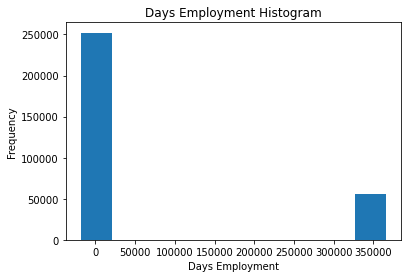

In [ ]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [ ]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


- 이상 징후는 채무불이행 비율이 낮은 것으로 확인된다.
- 이상한 값들을 처리하려면 결측값으로 바꾸거나 변측값으로 바꾸어야 한다.

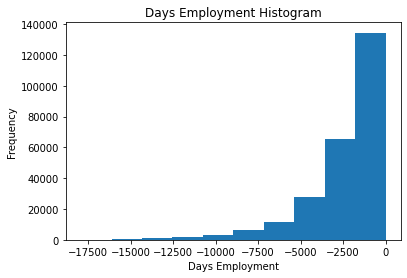

In [ ]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [ ]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


### Correlations

In [ ]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

### Effect of Age on Repayment

In [ ]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

- 고객이 나이가 많을수록 대출금을 제때 상환하는 경향이 있다.

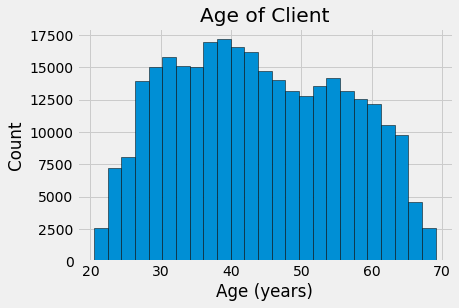

In [ ]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

- 특이점이 없다는 것을 확인할 수 있다.
- 연령대가 대상에 미치는 영향을 시각화하기 위해 kernel density estimation plot (KDE) 만들어보자.

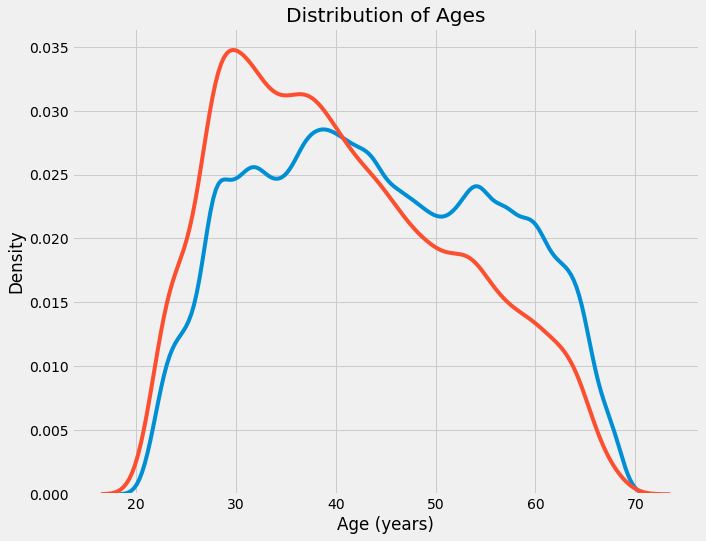

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

- target == 1 커브가 나이가 젊어지는 쪽을 향해 기울어진다.
- 이는 유의미한 상관 계수(-0.07 상관 계수)는 아니지만, 이 변수는 대상에 영향을 미치기 때문에 머신러닝 모델에서 유용할 것으로 보인다. 

In [ ]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [ ]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


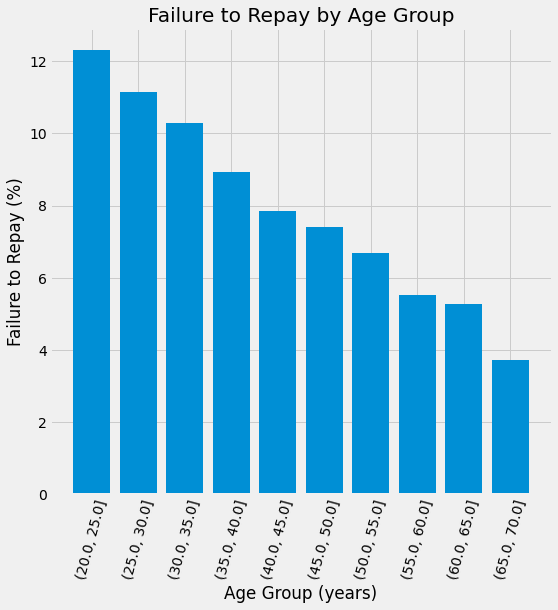

In [ ]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

- 분명한 경향성을 보이는 것을 확인할 수 있다.
- 젊은 지원자들은 대출금을 상환하지 않을 가능성이 더 높은 것을 확인할 수 있다.
- 상환불능률은 나이가 어린 3개의 연령층이 10%를 넘고, 최고령 연령층은 5%를 넘지 않는다.
- 이는 젊은 고객들은 대출금을 상환할 가능성이 적기 때문에, 은행이 젊은 고객들에게 더 많은 안내나 재정 계획 팁을 제공해야 하며, 제시간에 지불할 수 있도록 예방 조치를 취하는 것이 현명할 것이다.

### Exterior Sources
- 목표값과 가장 밀접한 음의 상관관계를 갖는 3가지 변수는 `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3`이다.
- 이는 "외부 데이터 소스의 정규화된 점수"를 나타낸다.

- EXT_SOURCE과 target 각각의 상관관계를 보여준다.

In [ ]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


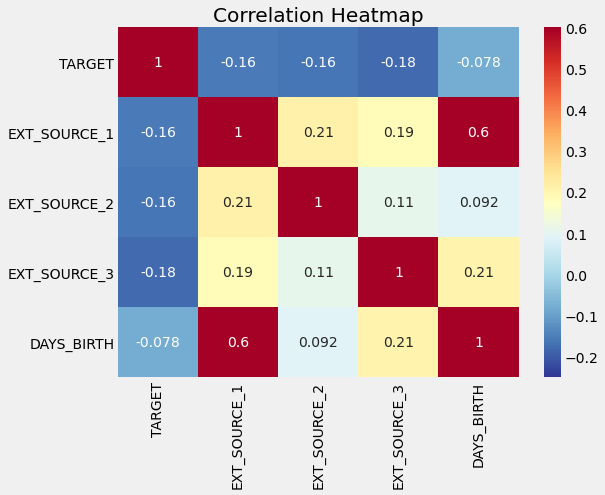

In [ ]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

- EXT_SOURCE 기능은 모두 target과 음의 상관관계를 가지고 있어 EXT_SOURCE의 가치가 증가할수록 고객이 대출금을 상환할 가능성이 더 높은 것을 알 수 있다.
- DAYS_BOYT가 EXT_SOURCE_1와 양의 상관관계가 있다는 것을 알 수 있다.
- 다음으로 대상의 값에 의해 색칠된 형상의 분포를 살펴볼 수 있다.

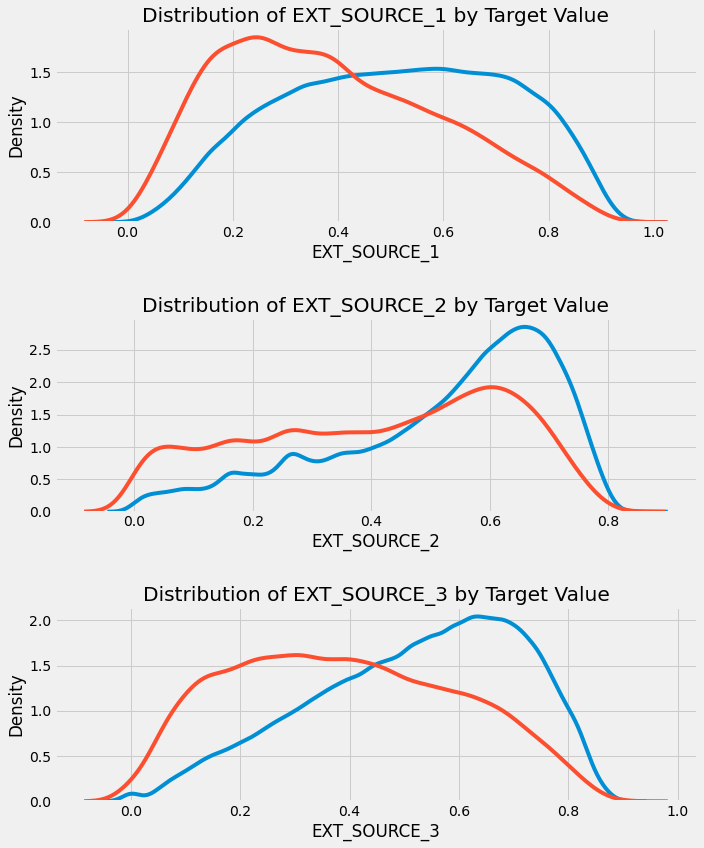

In [ ]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

- EXT_SOURCE_3은 target 값과의 차이가 가장 크다
- 이 feature와 대출금을 상환할 가능성이 상관관계가 크진 않지만, 어느 정도 관계가 있다는 것을 분명히 알 수 있다.. 